In [4]:
try:
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.16.1


In [9]:
from tensorflow.keras.datasets import cifar10

# Chargement du dataset CIFAR-10
cifar10_data = cifar10.load_data()

# Vérification du type de la variable
print(type(cifar10_data))

# Vérification de la taille du dataset
print(len(cifar10_data))


<class 'tuple'>
2


In [11]:
# Chargement des images et des labels de train et de test
(train_images, train_labels), (test_images, test_labels) = cifar10_data

# Affichage de la forme des arrays pour confirmation
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [12]:
# Affichage d'un exemple d'image et de sa forme
print(train_images[0])  # Affiche la matrice de pixels de la première image
print(train_images[0].shape)  # Affiche la forme de la première image

# Définition des noms de classes pour les étiquettes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
(32, 32, 3)


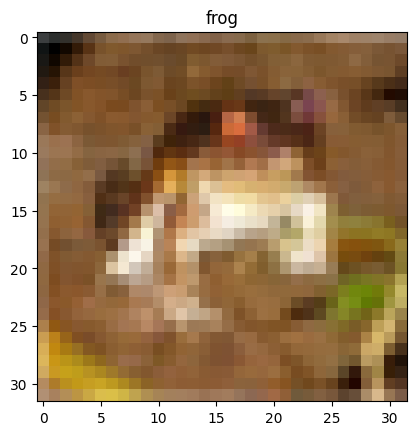

Distribution des classes dans le dataset d'entraînement :
airplane: 5000
automobile: 5000
bird: 5000
cat: 5000
deer: 5000
dog: 5000
frog: 5000
horse: 5000
ship: 5000
truck: 5000


In [13]:
# Afficher une image d'entraînement avec son label
plt.figure()
plt.imshow(train_images[0])
plt.title(class_names[train_labels[0][0]])
plt.show()

# Vérifier la distribution des classes dans le dataset

unique, counts = np.unique(train_labels, return_counts=True)
class_distribution = dict(zip(class_names, counts))

print("Distribution des classes dans le dataset d'entraînement :")
for class_name, count in class_distribution.items():
    print(f"{class_name}: {count}")

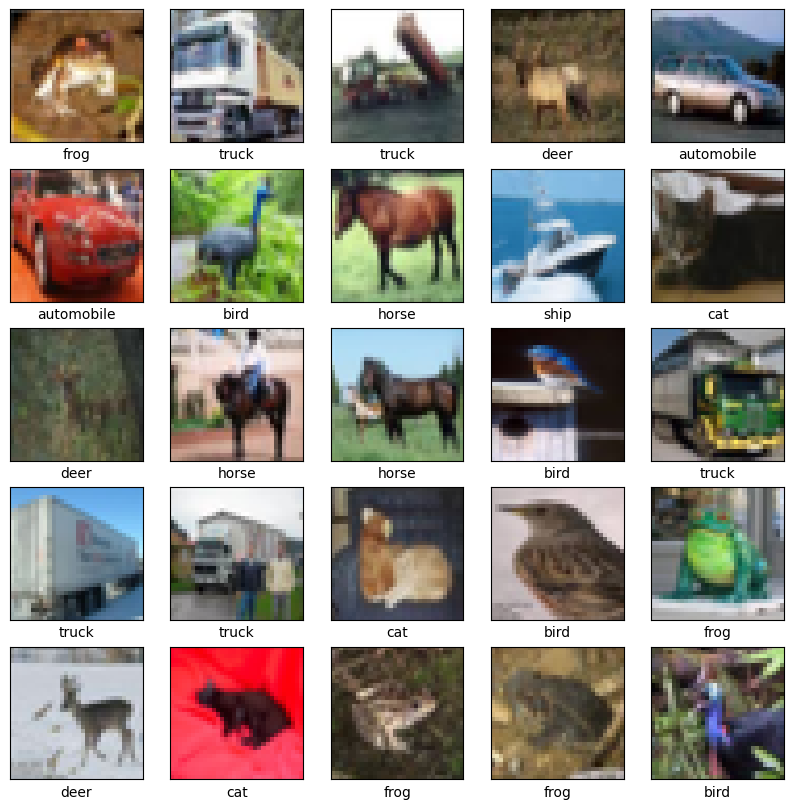

In [14]:
# Créer une figure de 5x5 pour afficher les 25 premières images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])  # Pas de graduations sur l'axe des x
    plt.yticks([])  # Pas de graduations sur l'axe des y
    plt.grid(False) # Pas de grille
    plt.imshow(train_images[i])  # Affiche l'image
    # Affiche le nom de la classe associée à l'image
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [15]:
# Normalisation des ensembles d'entraînement et de test
train_images = train_images / 255.0
test_images = test_images / 255.0

# Vérification de la normalisation en affichant les valeurs minimales et maximales
print("Valeurs minimales et maximales après normalisation :")
print(f"Train images: min={train_images.min()}, max={train_images.max()}")
print(f"Test images: min={test_images.min()}, max={test_images.max()}")


Valeurs minimales et maximales après normalisation :
Train images: min=0.0, max=1.0
Test images: min=0.0, max=1.0


In [22]:
from tensorflow.keras import layers, models

# Création du modèle
model = models.Sequential()

# Première couche (Flatten) : transforme les images 32x32x3 en un vecteur 1D de 3072 valeurs
model.add(layers.Flatten(input_shape=(32, 32, 3)))

# Deuxième couche (Dense) : une couche dense avec 128 neurones et activation ReLU
model.add(layers.Dense(128, activation='relu'))

# Troisième couche (Dense) : une couche de sortie avec 10 neurones (une pour chaque classe) et activation softmax
model.add(layers.Dense(10, activation='softmax'))

# Affichage du résumé du modèle
model.summary()


C:\Users\mathy\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
 # Compilation du modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [29]:
# Entraînement du modèle
history = model.fit(train_images, train_labels, epochs=10)

# test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
#     predictions = model.predict(test_images)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2762 - loss: 2.0112
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3706 - loss: 1.7564
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3936 - loss: 1.6936
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4028 - loss: 1.6577
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4128 - loss: 1.6423
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4183 - loss: 1.6291
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4231 - loss: 1.6126
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4288 - loss: 1.6037
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4287 - loss: 1.5866
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4319 - loss: 1.5836


In [31]:
# Évaluation du modèle
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - 1ms/step - accuracy: 0.4359 - loss: 1.5858


In [32]:
# Faire des prédictions sur l'ensemble de test
predictions = model.predict(test_images)

# Afficher un exemple de prédiction
print(predictions[0])  # Affiche les probabilités de chaque classe pour la première image
print(f"Classe prédite : {np.argmax(predictions[0])}")  # Classe ayant la probabilité la plus élevée

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[0.0508608  0.05595447 0.06619327 0.13972925 0.16848496 0.09464326
 0.07530605 0.01346527 0.32146657 0.01389609]
Classe prédite : 8


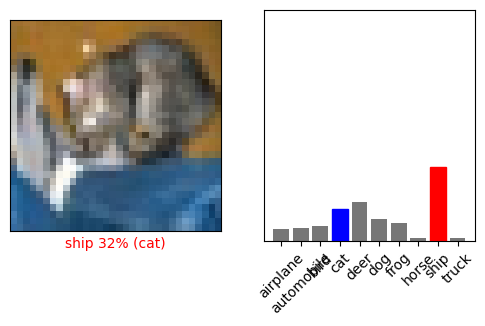

In [71]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i][0], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})", color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i][0]
    plt.grid(False)
    plt.xticks(range(10), class_names, rotation=45)
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Afficher une image et ses prédictions
i = 0  # Index de l'image que l'on souhaite afficher
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()


In [59]:
# Sélection d'une image du jeu de test
img = test_images[5]

# Afficher les dimensions de l'image avant transformation
print("Dimensions de l'image avant expand_dims:", img.shape)

# Ajouter une dimension pour que l'image ait la forme (1, 32, 32, 3)
img = np.expand_dims(img, axis=0)

# Afficher les dimensions de l'image après transformation
print("Dimensions de l'image après expand_dims:", img.shape)

# Prédire la classe de l'image
prediction = model.predict(img)

# Afficher la classe prédite
predicted_label = np.argmax(prediction[0])
print(f"Classe prédite : {class_names[predicted_label]} avec une probabilité de {100*np.max(prediction[0]):.2f}%")


Dimensions de l'image avant expand_dims: (32, 32, 3)
Dimensions de l'image après expand_dims: (1, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Classe prédite : frog avec une probabilité de 63.93%


In [66]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Création d'un modèle CNN
model = models.Sequential()

# Première couche convolutionnelle avec 32 filtres et une taille de kernel de 3x3
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Deuxième couche convolutionnelle avec 64 filtres
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Troisième couche convolutionnelle avec 64 filtres
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Aplatissement des résultats de la couche convolutive
model.add(layers.Flatten())

# Couche dense avec 64 neurones
model.add(layers.Dense(64, activation='relu'))

# Couche de sortie avec 10 neurones (pour les 10 classes) et activation softmax
model.add(layers.Dense(10, activation='softmax'))

# Compilation du modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Évaluation du modèle
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")


C:\Users\mathy\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.3559 - loss: 1.7369 - val_accuracy: 0.5405 - val_loss: 1.2887
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5793 - loss: 1.1836 - val_accuracy: 0.5869 - val_loss: 1.1586
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6396 - loss: 1.0163 - val_accuracy: 0.6561 - val_loss: 0.9966
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6807 - loss: 0.9102 - val_accuracy: 0.6731 - val_loss: 0.9317
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7128 - loss: 0.8267 - val_accuracy: 0.6801 - val_loss: 0.9349
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7286 - loss: 0.7774 - val_accuracy: 0.6975 - val_loss: 0.8869
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7509 - loss: 0.7115 - val_accuracy: 0.6908 - val_loss: 0.9146
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7630 - loss: 0

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7718 - loss: 0.6397 - val_accuracy: 0.8537 - val_loss: 0.4102
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8620 - loss: 0.3825 - val_accuracy: 0.8688 - val_loss: 0.3793
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8744 - loss: 0.3505 - val_accuracy: 0.8653 - val_loss: 0.3887
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8824 - loss: 0.3327 - val_accuracy: 0.8710 - val_loss: 0.3886
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8875 - loss: 0.3250 - val_accuracy: 0.8721 - val_loss: 0.3804
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8906 - loss: 0.3175 - val_accuracy: 0.8733 - val_loss: 0.4058
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8944 - loss: 0.3115 - val_accuracy: 0.8719 - val_loss: 0.4283
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8960 - loss: 0.3093 - 

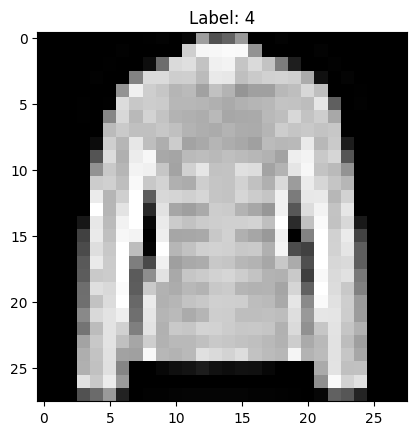

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Classe prédite : 4 avec une probabilité de 98.06%


In [74]:
import tensorflow_datasets as tfds

# Chargement du dataset Fashion MNIST
(ds_train, ds_test), ds_info = tfds.load('fashion_mnist', split=['train', 'test'], shuffle_files=True, as_supervised=True, with_info=True)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Prétraitement des données
def normalize_img(image, label):
    # Normalisation des images (valeurs entre 0 et 1)
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Application de la normalisation sur les ensembles d'entraînement et de test
ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)

# Mise en batch et optimisation des ensembles
ds_train = ds_train.cache().batch(32).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.batch(32).prefetch(tf.data.AUTOTUNE)

# Création du modèle
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compilation du modèle
model.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Affichage du résumé du modèle
# model.summary()

# Entraînement du modèle
history = model.fit(ds_train, epochs=10, validation_data=ds_test)

# Évaluation du modèle
test_loss, test_acc = model.evaluate(ds_test, verbose=2)
print(f"Test accuracy: {test_acc}")

# Affichage d'une image et prédiction
for image, label in ds_test.take(1):
    plt.imshow(np.squeeze(image[0]), cmap='gray')
    plt.title(f"Label: {label[0].numpy()}")
    plt.show()
    prediction = model.predict(np.expand_dims(image[0], axis=0))
    predicted_label = np.argmax(prediction[0])
    print(f"Classe prédite : {predicted_label} avec une probabilité de {100*np.max(prediction[0]):.2f}%")